<a href="https://colab.research.google.com/github/ParkHyunsu1110/Machine-Learning/blob/main/2021_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-최근접 이웃 회귀 

In [34]:
import numpy as np

In [35]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [36]:
import matplotlib.pyplot as plt

In [37]:
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


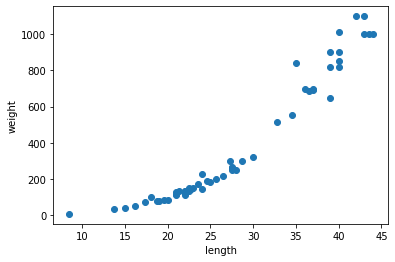

In [38]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
#훈련 세트 준비

In [40]:
from  sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [41]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [51]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [57]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [53]:
knr.score(train_input, train_target)

0.9804899950518966

In [54]:
knr.score(test_input, test_target)

0.974645996398761

In [43]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [44]:
knr.score(train_input, train_target)

0.9698823289099255

In [45]:
knr.score(test_input, test_target)

0.9928094061010639

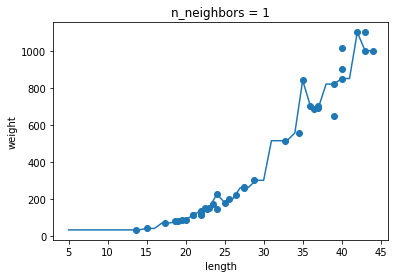

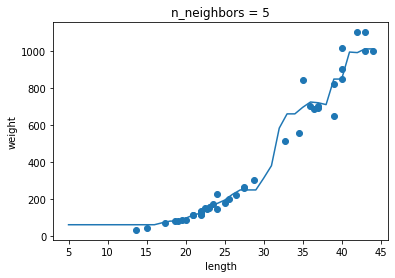

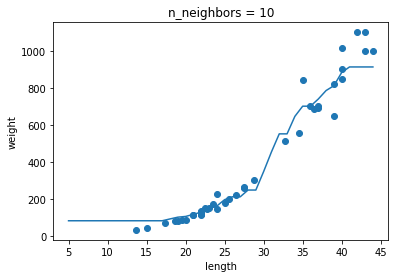

In [46]:
# 이웃 개수 줄이기
knr = KNeighborsRegressor()
# 5에서 45까지 좌표
x=np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일 때 예측 결과를 그래프로
for n in [1, 5, 10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  # 지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n)) # 대괄호 안에 어떠한 포맷으로 값을 넣겠다. 이 경우, n의 값이 1, 5, 10 이 됨
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

선형회귀

In [59]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [60]:
knr.score(train_input, train_target)

0.9804899950518966

In [61]:
knr.score(test_input, test_target)

0.974645996398761

In [62]:
print(knr.predict([[100]]))

[1033.33333333]


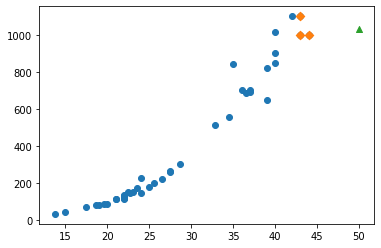

In [63]:
# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [65]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


학습한 직선 그리기

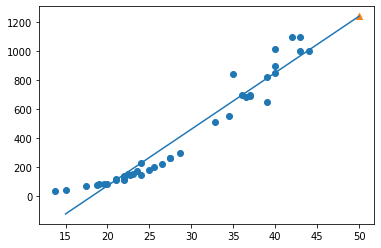

In [67]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [68]:
print(lr.score(train_input, train_target))

0.9398463339976039


In [69]:
print(lr.score(test_input, test_target))

0.8247503123313558


다항 회귀


In [71]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

모델 다시 훈련

In [72]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [74]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


학습한 직선 그리기

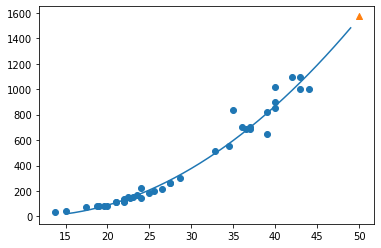

In [75]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()


In [76]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [77]:
print(lr.score(test_poly, test_target))

0.9775935108325122
